In [ ]:
!nvidia-smi

Sun Nov  1 03:08:22 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.32.00    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P0    24W / 300W |      0MiB / 16130MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 載入函數

In [ ]:
import numpy as np
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import plot_model

import matplotlib.pyplot as plt

os.chdir('/content/drive/Shared drives/類技術班教材/標準版/ 深度學習基礎/DL_part1/Answer')

# 動手試試看

請使用下面的資料集 `3_non_linear_train.csv` 訓練出一個迴歸模型。

In [ ]:
import pandas as pd

data = pd.read_csv('Data/3_non_linear_train.csv')
print(data.shape)
data.head()

(200, 2)


,x,y
0,-4.341593,1.403286
1,-4.297456,1.016483
2,-4.253319,1.169736
3,-4.209183,0.701714
4,-4.165046,0.676517


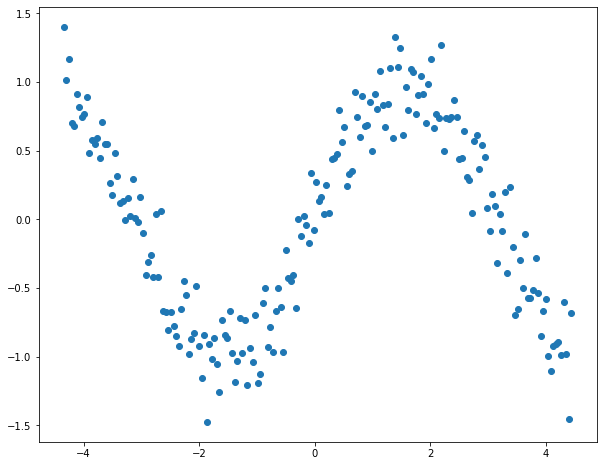

In [ ]:
x_in = data['x'] # 將 x 從資料中挑出來
y_noise = data['y'] # 將 y 從資料中挑出來

# 資料視覺化
plt.figure(figsize=(10, 8))
plt.scatter(x_in, y_noise)
plt.show()

## 建立模型


In [ ]:
input = tf.keras.layers.Input(shape=(1,), name='Input_layer')
dense1 = tf.keras.layers.Dense(8, use_bias=True, activation='tanh', name='dense1', kernel_initializer='glorot_uniform')
dense2 = tf.keras.layers.Dense(12, use_bias=True, activation='tanh', name='dense2', kernel_initializer='glorot_uniform')
dense3 = tf.keras.layers.Dense(4, use_bias=True, activation='tanh', name='dense3', kernel_initializer='glorot_uniform')
dense4 = tf.keras.layers.Dense(1, use_bias=True, activation='linear', name='dense4', kernel_initializer='glorot_uniform')

dense_output1 = dense1(input)
dense_output2 = dense2(dense_output1)
dense_output3 = dense3(dense_output2)
output = dense4(dense_output3)

model = tf.keras.Model(input, output, name='polynomial_function')

model.summary()

Model: "polynomial_function"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_layer (InputLayer)     [(None, 1)]               0         
_________________________________________________________________
dense1 (Dense)               (None, 8)                 16        
_________________________________________________________________
dense2 (Dense)               (None, 12)                108       
_________________________________________________________________
dense3 (Dense)               (None, 4)                 52        
_________________________________________________________________
dense4 (Dense)               (None, 1)                 5         
Total params: 181
Trainable params: 181
Non-trainable params: 0
_________________________________________________________________


## 訓練模型

* `loss` 請使用 `mean_squared_error`
* `optimzier` 請使用 `sgd`

In [ ]:
sgd = tf.keras.optimizers.SGD(learning_rate=1e-2)
model.compile(loss='mean_squared_error', optimizer=sgd)

請輸入訓練資料集。

In [ ]:
# 訓練模型
model.fit(x_in, y_noise, epochs=200)  # 一個 epoch 會看過一次所有的資料

Epoch 1/200
7/7 [==============================] - 0s 2ms/step - loss: 0.4872
Epoch 2/200
7/7 [==============================] - 0s 3ms/step - loss: 0.4621
Epoch 3/200
7/7 [==============================] - 0s 2ms/step - loss: 0.4460
Epoch 4/200
7/7 [==============================] - 0s 2ms/step - loss: 0.4350
Epoch 5/200
7/7 [==============================] - 0s 2ms/step - loss: 0.4241
Epoch 6/200
7/7 [==============================] - 0s 2ms/step - loss: 0.4059
Epoch 7/200
7/7 [==============================] - 0s 2ms/step - loss: 0.3911
Epoch 8/200
7/7 [==============================] - 0s 2ms/step - loss: 0.3772
Epoch 9/200
7/7 [==============================] - 0s 2ms/step - loss: 0.3623
Epoch 10/200
7/7 [==============================] - 0s 2ms/step - loss: 0.3515
Epoch 11/200
7/7 [==============================] - 0s 2ms/step - loss: 0.3339
Epoch 12/200
7/7 [==============================] - 0s 2ms/step - loss: 0.3200
Epoch 13/200
7/7 [==============================] - 0s 2ms/st

請將 `x_in` 拿來預測。

In [ ]:
# 模型預測
y_pred = model.predict(x_in)

### 視覺化結果


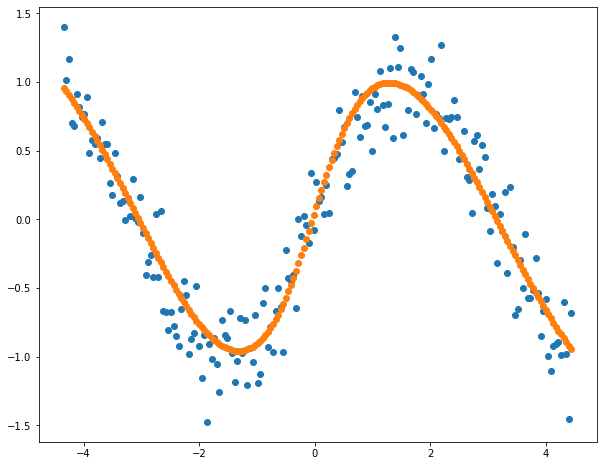

In [ ]:
# 資料視覺化
plt.figure(figsize=(10, 8))
plt.scatter(x_in, y_noise)
plt.scatter(x_in, y_pred)
plt.show()